In [1]:
from train import train
from utils import *
import sys
import argparse
import matplotlib.pyplot as plt

SyntaxError: invalid syntax (train.py, line 108)

In [2]:
batch_size = 2**18
epoch_size = 128*batch_size
scaling_sample_size = batch_size

In [3]:
sys.argv = [
    "notebook",
    "--name", "experiment_1_ddpm_MB",
    "--device", "cuda",
    
    "--dataset", "TrajectoryPositionMomentum",
    "--data_path", "datasets/MullerBrown/VariableICManyIC/MullerBrown_LangevinVVMD",
    "--dataset_args","scaling_sample_size="+str(scaling_sample_size),"device=cuda",
    
    "--epochs", "512",
    "--epoch_size", str(epoch_size), 
    "--batch_size", str(batch_size), 
    
    "--lr", "0.081040698668148196",
    "--optimizer", "adam",
    "--scheduler", "exponential",
    "--scheduler_args", "gamma=0.9999259206835124",
    
    "--architecture", "MLP",
    "--architecture_args", "learnable_scale=True", "embed_dim=32", "data_dim=4",
    "--noise_schedule", "sigmoid",
    "--noise_schedule_args", "low=-8.0", "high=-4.0", "diffusion_steps=2000", "device=cuda",
    "--s_phys_max", "512",
    "--t_diff_max", "2000",
    "--scaled","False",
    
    "--checkpoint_path", "models/MullerBrown/FixedIC/checkpoint.pth",
    "--log_interval", "1",
    "--plot_interval", "4096"
]

parser = argparse.ArgumentParser()

# Required Args
parser.add_argument('--name', type=str, required=True, help='Name of this run')
parser.add_argument('--device', type=str, required=True, help='Device to run on')
parser.add_argument('--scaled', type=str,  default='False', help='To scale or not to scale')

# Dataset
parser.add_argument('--dataset', type=str, default='TrajectoryPositionMomentum', help='Dataset class name')
parser.add_argument('--dataset_args', nargs='*', default=[], help='Extra dataset args in key=value format')
parser.add_argument('--data_path', type=str, default='datasets/MullerBrown/FixedIC', help='Path to dataset')

# Training parameters
parser.add_argument('--epochs', type=int, default=2**10, help='Number of training epochs')
parser.add_argument('--epoch_size', type=int, default=2**22, help='Number of samples in each epoch')
parser.add_argument('--batch_size', type=int, default=2**20, help='Batch size')
parser.add_argument('--lr', type=float, default=0.04, help='Learning rate')
parser.add_argument('--optimizer', type=str, default='adam', help='Optimizer choice')
parser.add_argument('--optimizer_args', nargs='*', default=[], help='Optimizer arguments in key=value format')
parser.add_argument('--scheduler', type=str, default='ExponentialLR', help='Scheduler choice')
parser.add_argument('--scheduler_args', nargs='*', default=["gamma=0.9999"], help='Scheduler arguments in key=value format')

# DDPM parameters
parser.add_argument('--architecture', type=str, default='painn', help='Architecture choice')
parser.add_argument('--architecture_args', nargs='*', default=[], help='Architecture arguments in key=value format')
parser.add_argument('--noise_schedule', type=str, default='linear', help='Noise schedule choice')
parser.add_argument('--noise_schedule_args', nargs='*', default=[], help='Noise schedule arguments in key=value format')
parser.add_argument('--s_phys_max', type=int, default=500, help='Maximum physical time step')
parser.add_argument('--t_diff_max', type=int, default=1000, help='Maximum diffusion steps')

# Saving parameters
parser.add_argument('--checkpoint_path', type=str, default='models/MullerBrown/FixedIC/checkpoint.pth', help='Checkpoint path')
parser.add_argument('--resume', action='store_true', help='Resume training')
parser.add_argument('--log_interval', type=int, default=8, help='Number of steps between logging')
parser.add_argument('--plot_interval', type=int, default=2048, help='Number of steps between loss contour plots')

args = parser.parse_args()

model,dataset,args = train(args)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: winsaton (winsaton-univeristy-of-minnesota). Use `wandb login --relogin` to force relogin


Loading dataset...


/users/1/sull1276/aced-emulator-optimized/datasets/dataset.py:164: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  position_data = torch.load(data_path+"_position", map_locati

Initializing model...
ImplicitTransferOperatorDDPM(
  (architechture): LangevinMLP(
    (s_phys_embedding): SinCosTimeEmbedding()
    (t_diff_embedding): SinCosTimeEmbedding()
    (module): Sequential(
      (0): Linear(in_features=72, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): ReLU()
      (6): Linear(in_features=64, out_features=64, bias=True)
      (7): ReLU()
      (8): Linear(in_features=64, out_features=4, bias=True)
    )
  )
)
Initializing optimizer...
Initializing scheduler...
Starting training loop...


Epoch 1/512:   0%|                                              | 0/128 [00:00<?, ? batch/s, batch=0/128, loss=1.004950]/users/1/sull1276/.conda/envs/aced/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
Epoch 1/512:   5%|██                                   | 7/128 [00:18<03:54,  1.94s/ batch, batch=11/128, loss=0.959339]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_1_checkpoint.pth


Epoch 1/512: 100%|██████████████████████████████████| 128/128 [00:20<00:00,  6.21 batch/s, batch=127/128, loss=0.388383]


Epoch 1: Loss = 0.388383


Epoch 2/512: 100%|██████████████████████████████████| 128/128 [00:02<00:00, 57.75 batch/s, batch=127/128, loss=0.236413]


Epoch 2: Loss = 0.236413


Epoch 3/512: 100%|██████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.264777]


Epoch 3: Loss = 0.264777


Epoch 4/512: 100%|██████████████████████████████████| 128/128 [00:02<00:00, 57.96 batch/s, batch=127/128, loss=0.244279]


Epoch 4: Loss = 0.244279


Epoch 5/512: 100%|██████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.224636]


Epoch 5: Loss = 0.224636


Epoch 6/512: 100%|██████████████████████████████████| 128/128 [00:02<00:00, 57.71 batch/s, batch=127/128, loss=0.230929]


Epoch 6: Loss = 0.230929


Epoch 7/512: 100%|██████████████████████████████████| 128/128 [00:02<00:00, 57.97 batch/s, batch=127/128, loss=0.231674]


Epoch 7: Loss = 0.231674


Epoch 8/512: 100%|██████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.202297]


Epoch 8: Loss = 0.202297


Epoch 9/512: 100%|██████████████████████████████████| 128/128 [00:02<00:00, 57.82 batch/s, batch=127/128, loss=0.237076]


Epoch 9: Loss = 0.237076


Epoch 10/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.64 batch/s, batch=127/128, loss=0.218795]


Epoch 10: Loss = 0.218795


Epoch 11/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.79 batch/s, batch=127/128, loss=0.191328]


Epoch 11: Loss = 0.191328


Epoch 12/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.199403]


Epoch 12: Loss = 0.199403


Epoch 13/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.205079]


Epoch 13: Loss = 0.205079


Epoch 14/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 58.01 batch/s, batch=127/128, loss=0.190172]


Epoch 14: Loss = 0.190172


Epoch 15/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.197392]


Epoch 15: Loss = 0.197392


Epoch 16/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.96 batch/s, batch=127/128, loss=0.190741]


Epoch 16: Loss = 0.190741


Epoch 17/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.82 batch/s, batch=127/128, loss=0.212614]


Epoch 17: Loss = 0.212614


Epoch 18/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 58.01 batch/s, batch=127/128, loss=0.185775]


Epoch 18: Loss = 0.185775


Epoch 19/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.64 batch/s, batch=127/128, loss=0.174177]


Epoch 19: Loss = 0.174177


Epoch 20/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.99 batch/s, batch=127/128, loss=0.205701]


Epoch 20: Loss = 0.205701


Epoch 21/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.94 batch/s, batch=127/128, loss=0.191730]


Epoch 21: Loss = 0.191730


Epoch 22/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.95 batch/s, batch=127/128, loss=0.182187]


Epoch 22: Loss = 0.182187


Epoch 23/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.176325]


Epoch 23: Loss = 0.176325


Epoch 24/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.45 batch/s, batch=127/128, loss=0.195884]


Epoch 24: Loss = 0.195884


Epoch 25/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.83 batch/s, batch=127/128, loss=0.161036]


Epoch 25: Loss = 0.161036


Epoch 26/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.173970]


Epoch 26: Loss = 0.173970


Epoch 27/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.96 batch/s, batch=127/128, loss=0.206113]


Epoch 27: Loss = 0.206113


Epoch 28/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.18 batch/s, batch=127/128, loss=0.174840]


Epoch 28: Loss = 0.174840


Epoch 29/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 58.01 batch/s, batch=127/128, loss=0.165130]


Epoch 29: Loss = 0.165130


Epoch 30/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.75 batch/s, batch=127/128, loss=0.176331]


Epoch 30: Loss = 0.176331


Epoch 31/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.59 batch/s, batch=127/128, loss=0.232681]


Epoch 31: Loss = 0.232681


Epoch 32/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.94 batch/s, batch=127/128, loss=0.172810]


Epoch 32: Loss = 0.172810


Epoch 33/512:   5%|█▉                                  | 7/128 [00:17<03:37,  1.80s/ batch, batch=11/128, loss=0.171565]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_33_checkpoint.pth


Epoch 33/512: 100%|█████████████████████████████████| 128/128 [00:19<00:00,  6.65 batch/s, batch=127/128, loss=0.172631]


Epoch 33: Loss = 0.172631


Epoch 34/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.54 batch/s, batch=127/128, loss=0.174400]


Epoch 34: Loss = 0.174400


Epoch 35/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.78 batch/s, batch=127/128, loss=0.156852]


Epoch 35: Loss = 0.156852


Epoch 36/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.166106]


Epoch 36: Loss = 0.166106


Epoch 37/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.79 batch/s, batch=127/128, loss=0.160568]


Epoch 37: Loss = 0.160568


Epoch 38/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.165083]


Epoch 38: Loss = 0.165083


Epoch 39/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 58.04 batch/s, batch=127/128, loss=0.158237]


Epoch 39: Loss = 0.158237


Epoch 40/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.94 batch/s, batch=127/128, loss=0.160105]


Epoch 40: Loss = 0.160105


Epoch 41/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.74 batch/s, batch=127/128, loss=0.160823]


Epoch 41: Loss = 0.160823


Epoch 42/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.93 batch/s, batch=127/128, loss=0.156476]


Epoch 42: Loss = 0.156476


Epoch 43/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.174344]


Epoch 43: Loss = 0.174344


Epoch 44/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.92 batch/s, batch=127/128, loss=0.175050]


Epoch 44: Loss = 0.175050


Epoch 45/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.157559]


Epoch 45: Loss = 0.157559


Epoch 46/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 56.66 batch/s, batch=127/128, loss=0.159278]


Epoch 46: Loss = 0.159278


Epoch 47/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.28 batch/s, batch=127/128, loss=0.160761]


Epoch 47: Loss = 0.160761


Epoch 48/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.40 batch/s, batch=127/128, loss=0.152698]


Epoch 48: Loss = 0.152698


Epoch 49/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.70 batch/s, batch=127/128, loss=0.149700]


Epoch 49: Loss = 0.149700


Epoch 50/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.179745]


Epoch 50: Loss = 0.179745


Epoch 51/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.152496]


Epoch 51: Loss = 0.152496


Epoch 52/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.155054]


Epoch 52: Loss = 0.155054


Epoch 53/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.152918]


Epoch 53: Loss = 0.152918


Epoch 54/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.81 batch/s, batch=127/128, loss=0.161320]


Epoch 54: Loss = 0.161320


Epoch 55/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.47 batch/s, batch=127/128, loss=0.167523]


Epoch 55: Loss = 0.167523


Epoch 56/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.170041]


Epoch 56: Loss = 0.170041


Epoch 57/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.51 batch/s, batch=127/128, loss=0.167508]


Epoch 57: Loss = 0.167508


Epoch 58/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.167411]


Epoch 58: Loss = 0.167411


Epoch 59/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.83 batch/s, batch=127/128, loss=0.153142]


Epoch 59: Loss = 0.153142


Epoch 60/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.82 batch/s, batch=127/128, loss=0.168360]


Epoch 60: Loss = 0.168360


Epoch 61/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.73 batch/s, batch=127/128, loss=0.159199]


Epoch 61: Loss = 0.159199


Epoch 62/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 58.00 batch/s, batch=127/128, loss=0.171533]


Epoch 62: Loss = 0.171533


Epoch 63/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.148788]


Epoch 63: Loss = 0.148788


Epoch 64/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 58.00 batch/s, batch=127/128, loss=0.152075]


Epoch 64: Loss = 0.152075


Epoch 65/512:   5%|█▉                                  | 7/128 [00:17<03:38,  1.80s/ batch, batch=11/128, loss=0.149894]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_65_checkpoint.pth


Epoch 65/512: 100%|█████████████████████████████████| 128/128 [00:19<00:00,  6.63 batch/s, batch=127/128, loss=0.154940]


Epoch 65: Loss = 0.154940


Epoch 66/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.72 batch/s, batch=127/128, loss=0.166368]


Epoch 66: Loss = 0.166368


Epoch 67/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.65 batch/s, batch=127/128, loss=0.149354]


Epoch 67: Loss = 0.149354


Epoch 68/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.78 batch/s, batch=127/128, loss=0.152912]


Epoch 68: Loss = 0.152912


Epoch 69/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.70 batch/s, batch=127/128, loss=0.151728]


Epoch 69: Loss = 0.151728


Epoch 70/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.73 batch/s, batch=127/128, loss=0.148373]


Epoch 70: Loss = 0.148373


Epoch 71/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.75 batch/s, batch=127/128, loss=0.150906]


Epoch 71: Loss = 0.150906


Epoch 72/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.146717]


Epoch 72: Loss = 0.146717


Epoch 73/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.149528]


Epoch 73: Loss = 0.149528


Epoch 74/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.74 batch/s, batch=127/128, loss=0.148714]


Epoch 74: Loss = 0.148714


Epoch 75/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.149530]


Epoch 75: Loss = 0.149530


Epoch 76/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.71 batch/s, batch=127/128, loss=0.149299]


Epoch 76: Loss = 0.149299


Epoch 77/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.187044]


Epoch 77: Loss = 0.187044


Epoch 78/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.95 batch/s, batch=127/128, loss=0.147642]


Epoch 78: Loss = 0.147642


Epoch 79/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.74 batch/s, batch=127/128, loss=0.148743]


Epoch 79: Loss = 0.148743


Epoch 80/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.162848]


Epoch 80: Loss = 0.162848


Epoch 81/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.153244]


Epoch 81: Loss = 0.153244


Epoch 82/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.82 batch/s, batch=127/128, loss=0.151878]


Epoch 82: Loss = 0.151878


Epoch 83/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 56.63 batch/s, batch=127/128, loss=0.150217]


Epoch 83: Loss = 0.150217


Epoch 84/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.64 batch/s, batch=127/128, loss=0.149021]


Epoch 84: Loss = 0.149021


Epoch 85/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.92 batch/s, batch=127/128, loss=0.150968]


Epoch 85: Loss = 0.150968


Epoch 86/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.154732]


Epoch 86: Loss = 0.154732


Epoch 87/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.56 batch/s, batch=127/128, loss=0.149207]


Epoch 87: Loss = 0.149207


Epoch 88/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.146688]


Epoch 88: Loss = 0.146688


Epoch 89/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.60 batch/s, batch=127/128, loss=0.144370]


Epoch 89: Loss = 0.144370


Epoch 90/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.94 batch/s, batch=127/128, loss=0.145078]


Epoch 90: Loss = 0.145078


Epoch 91/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.151025]


Epoch 91: Loss = 0.151025


Epoch 92/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.145053]


Epoch 92: Loss = 0.145053


Epoch 93/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.144789]


Epoch 93: Loss = 0.144789


Epoch 94/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.52 batch/s, batch=127/128, loss=0.146576]


Epoch 94: Loss = 0.146576


Epoch 95/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.144246]


Epoch 95: Loss = 0.144246


Epoch 96/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.150038]


Epoch 96: Loss = 0.150038


Epoch 97/512:   5%|█▉                                  | 7/128 [00:17<03:39,  1.81s/ batch, batch=11/128, loss=0.145535]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_97_checkpoint.pth


Epoch 97/512: 100%|█████████████████████████████████| 128/128 [00:19<00:00,  6.59 batch/s, batch=127/128, loss=0.146758]


Epoch 97: Loss = 0.146758


Epoch 98/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.75 batch/s, batch=127/128, loss=0.146124]


Epoch 98: Loss = 0.146124


Epoch 99/512: 100%|█████████████████████████████████| 128/128 [00:02<00:00, 57.93 batch/s, batch=127/128, loss=0.145697]


Epoch 99: Loss = 0.145697


Epoch 100/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.147873]


Epoch 100: Loss = 0.147873


Epoch 101/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.142189]


Epoch 101: Loss = 0.142189


Epoch 102/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.145308]


Epoch 102: Loss = 0.145308


Epoch 103/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.142444]


Epoch 103: Loss = 0.142444


Epoch 104/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.145044]


Epoch 104: Loss = 0.145044


Epoch 105/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.146023]


Epoch 105: Loss = 0.146023


Epoch 106/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.147001]


Epoch 106: Loss = 0.147001


Epoch 107/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.75 batch/s, batch=127/128, loss=0.146308]


Epoch 107: Loss = 0.146308


Epoch 108/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.93 batch/s, batch=127/128, loss=0.155405]


Epoch 108: Loss = 0.155405


Epoch 109/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.95 batch/s, batch=127/128, loss=0.146832]


Epoch 109: Loss = 0.146832


Epoch 110/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.02 batch/s, batch=127/128, loss=0.143624]


Epoch 110: Loss = 0.143624


Epoch 111/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.152613]


Epoch 111: Loss = 0.152613


Epoch 112/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.05 batch/s, batch=127/128, loss=0.143720]


Epoch 112: Loss = 0.143720


Epoch 113/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.71 batch/s, batch=127/128, loss=0.143455]


Epoch 113: Loss = 0.143455


Epoch 114/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.11 batch/s, batch=127/128, loss=0.147443]


Epoch 114: Loss = 0.147443


Epoch 115/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.02 batch/s, batch=127/128, loss=0.155742]


Epoch 115: Loss = 0.155742


Epoch 116/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.57 batch/s, batch=127/128, loss=0.144962]


Epoch 116: Loss = 0.144962


Epoch 117/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.94 batch/s, batch=127/128, loss=0.146665]


Epoch 117: Loss = 0.146665


Epoch 118/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.143471]


Epoch 118: Loss = 0.143471


Epoch 119/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.93 batch/s, batch=127/128, loss=0.147318]


Epoch 119: Loss = 0.147318


Epoch 120/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.56 batch/s, batch=127/128, loss=0.146337]


Epoch 120: Loss = 0.146337


Epoch 121/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.144049]


Epoch 121: Loss = 0.144049


Epoch 122/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.76 batch/s, batch=127/128, loss=0.143131]


Epoch 122: Loss = 0.143131


Epoch 123/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.00 batch/s, batch=127/128, loss=0.154609]


Epoch 123: Loss = 0.154609


Epoch 124/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.158008]


Epoch 124: Loss = 0.158008


Epoch 125/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.142806]


Epoch 125: Loss = 0.142806


Epoch 126/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.143038]


Epoch 126: Loss = 0.143038


Epoch 127/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.75 batch/s, batch=127/128, loss=0.151122]


Epoch 127: Loss = 0.151122


Epoch 128/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.81 batch/s, batch=127/128, loss=0.143103]


Epoch 128: Loss = 0.143103


Epoch 129/512:   5%|█▉                                 | 7/128 [00:17<03:34,  1.77s/ batch, batch=11/128, loss=0.145999]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_129_checkpoint.pth


Epoch 129/512: 100%|████████████████████████████████| 128/128 [00:19<00:00,  6.73 batch/s, batch=127/128, loss=0.144684]


Epoch 129: Loss = 0.144684


Epoch 130/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.94 batch/s, batch=127/128, loss=0.146404]


Epoch 130: Loss = 0.146404


Epoch 131/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.146831]


Epoch 131: Loss = 0.146831


Epoch 132/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.143010]


Epoch 132: Loss = 0.143010


Epoch 133/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.37 batch/s, batch=127/128, loss=0.141811]


Epoch 133: Loss = 0.141811


Epoch 134/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.83 batch/s, batch=127/128, loss=0.141825]


Epoch 134: Loss = 0.141825


Epoch 135/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.144966]


Epoch 135: Loss = 0.144966


Epoch 136/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.07 batch/s, batch=127/128, loss=0.143338]


Epoch 136: Loss = 0.143338


Epoch 137/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.148026]


Epoch 137: Loss = 0.148026


Epoch 138/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.97 batch/s, batch=127/128, loss=0.144321]


Epoch 138: Loss = 0.144321


Epoch 139/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.96 batch/s, batch=127/128, loss=0.143540]


Epoch 139: Loss = 0.143540


Epoch 140/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.70 batch/s, batch=127/128, loss=0.142776]


Epoch 140: Loss = 0.142776


Epoch 141/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.03 batch/s, batch=127/128, loss=0.141396]


Epoch 141: Loss = 0.141396


Epoch 142/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.141388]


Epoch 142: Loss = 0.141388


Epoch 143/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.141798]


Epoch 143: Loss = 0.141798


Epoch 144/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.143719]


Epoch 144: Loss = 0.143719


Epoch 145/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.96 batch/s, batch=127/128, loss=0.151262]


Epoch 145: Loss = 0.151262


Epoch 146/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.56 batch/s, batch=127/128, loss=0.141488]


Epoch 146: Loss = 0.141488


Epoch 147/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.01 batch/s, batch=127/128, loss=0.145728]


Epoch 147: Loss = 0.145728


Epoch 148/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.144073]


Epoch 148: Loss = 0.144073


Epoch 149/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.94 batch/s, batch=127/128, loss=0.146518]


Epoch 149: Loss = 0.146518


Epoch 150/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.93 batch/s, batch=127/128, loss=0.141610]


Epoch 150: Loss = 0.141610


Epoch 151/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.73 batch/s, batch=127/128, loss=0.143137]


Epoch 151: Loss = 0.143137


Epoch 152/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.92 batch/s, batch=127/128, loss=0.143056]


Epoch 152: Loss = 0.143056


Epoch 153/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.142710]


Epoch 153: Loss = 0.142710


Epoch 154/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.03 batch/s, batch=127/128, loss=0.141777]


Epoch 154: Loss = 0.141777


Epoch 155/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.05 batch/s, batch=127/128, loss=0.140613]


Epoch 155: Loss = 0.140613


Epoch 156/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.142058]


Epoch 156: Loss = 0.142058


Epoch 157/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.00 batch/s, batch=127/128, loss=0.141375]


Epoch 157: Loss = 0.141375


Epoch 158/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.142175]


Epoch 158: Loss = 0.142175


Epoch 159/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.95 batch/s, batch=127/128, loss=0.142017]


Epoch 159: Loss = 0.142017


Epoch 160/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.59 batch/s, batch=127/128, loss=0.140937]


Epoch 160: Loss = 0.140937


Epoch 161/512:   5%|█▉                                 | 7/128 [00:17<03:39,  1.82s/ batch, batch=11/128, loss=0.141605]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_161_checkpoint.pth


Epoch 161/512: 100%|████████████████████████████████| 128/128 [00:19<00:00,  6.59 batch/s, batch=127/128, loss=0.140342]


Epoch 161: Loss = 0.140342


Epoch 162/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.74 batch/s, batch=127/128, loss=0.141956]


Epoch 162: Loss = 0.141956


Epoch 163/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.143172]


Epoch 163: Loss = 0.143172


Epoch 164/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.81 batch/s, batch=127/128, loss=0.140627]


Epoch 164: Loss = 0.140627


Epoch 165/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.93 batch/s, batch=127/128, loss=0.140367]


Epoch 165: Loss = 0.140367


Epoch 166/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.68 batch/s, batch=127/128, loss=0.142251]


Epoch 166: Loss = 0.142251


Epoch 167/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.140535]


Epoch 167: Loss = 0.140535


Epoch 168/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.141167]


Epoch 168: Loss = 0.141167


Epoch 169/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.97 batch/s, batch=127/128, loss=0.141311]


Epoch 169: Loss = 0.141311


Epoch 170/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.93 batch/s, batch=127/128, loss=0.141363]


Epoch 170: Loss = 0.141363


Epoch 171/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.79 batch/s, batch=127/128, loss=0.140946]


Epoch 171: Loss = 0.140946


Epoch 172/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.93 batch/s, batch=127/128, loss=0.141188]


Epoch 172: Loss = 0.141188


Epoch 173/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.142854]


Epoch 173: Loss = 0.142854


Epoch 174/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.81 batch/s, batch=127/128, loss=0.140716]


Epoch 174: Loss = 0.140716


Epoch 175/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.69 batch/s, batch=127/128, loss=0.140708]


Epoch 175: Loss = 0.140708


Epoch 176/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.140761]


Epoch 176: Loss = 0.140761


Epoch 177/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.140807]


Epoch 177: Loss = 0.140807


Epoch 178/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.74 batch/s, batch=127/128, loss=0.140873]


Epoch 178: Loss = 0.140873


Epoch 179/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.48 batch/s, batch=127/128, loss=0.141146]


Epoch 179: Loss = 0.141146


Epoch 180/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.00 batch/s, batch=127/128, loss=0.141119]


Epoch 180: Loss = 0.141119


Epoch 181/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.01 batch/s, batch=127/128, loss=0.140170]


Epoch 181: Loss = 0.140170


Epoch 182/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.72 batch/s, batch=127/128, loss=0.141779]


Epoch 182: Loss = 0.141779


Epoch 183/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.141074]


Epoch 183: Loss = 0.141074


Epoch 184/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.144089]


Epoch 184: Loss = 0.144089


Epoch 185/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.09 batch/s, batch=127/128, loss=0.140188]


Epoch 185: Loss = 0.140188


Epoch 186/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.140207]


Epoch 186: Loss = 0.140207


Epoch 187/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.00 batch/s, batch=127/128, loss=0.140060]


Epoch 187: Loss = 0.140060


Epoch 188/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.140478]


Epoch 188: Loss = 0.140478


Epoch 189/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.140096]


Epoch 189: Loss = 0.140096


Epoch 190/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.141383]


Epoch 190: Loss = 0.141383


Epoch 191/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.82 batch/s, batch=127/128, loss=0.140009]


Epoch 191: Loss = 0.140009


Epoch 192/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.92 batch/s, batch=127/128, loss=0.139677]


Epoch 192: Loss = 0.139677


Epoch 193/512:   5%|█▉                                 | 7/128 [00:16<03:33,  1.77s/ batch, batch=11/128, loss=0.139641]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_193_checkpoint.pth


Epoch 193/512: 100%|████████████████████████████████| 128/128 [00:18<00:00,  6.75 batch/s, batch=127/128, loss=0.140187]


Epoch 193: Loss = 0.140187


Epoch 194/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.81 batch/s, batch=127/128, loss=0.140003]


Epoch 194: Loss = 0.140003


Epoch 195/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.139983]


Epoch 195: Loss = 0.139983


Epoch 196/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.139313]


Epoch 196: Loss = 0.139313


Epoch 197/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.82 batch/s, batch=127/128, loss=0.139699]


Epoch 197: Loss = 0.139699


Epoch 198/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.79 batch/s, batch=127/128, loss=0.140928]


Epoch 198: Loss = 0.140928


Epoch 199/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.67 batch/s, batch=127/128, loss=0.140507]


Epoch 199: Loss = 0.140507


Epoch 200/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.68 batch/s, batch=127/128, loss=0.140276]


Epoch 200: Loss = 0.140276


Epoch 201/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.83 batch/s, batch=127/128, loss=0.140140]


Epoch 201: Loss = 0.140140


Epoch 202/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.140789]


Epoch 202: Loss = 0.140789


Epoch 203/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.64 batch/s, batch=127/128, loss=0.140384]


Epoch 203: Loss = 0.140384


Epoch 204/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.83 batch/s, batch=127/128, loss=0.139577]


Epoch 204: Loss = 0.139577


Epoch 205/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.139203]


Epoch 205: Loss = 0.139203


Epoch 206/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.68 batch/s, batch=127/128, loss=0.140417]


Epoch 206: Loss = 0.140417


Epoch 207/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.94 batch/s, batch=127/128, loss=0.140348]


Epoch 207: Loss = 0.140348


Epoch 208/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.76 batch/s, batch=127/128, loss=0.138691]


Epoch 208: Loss = 0.138691


Epoch 209/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.140354]


Epoch 209: Loss = 0.140354


Epoch 210/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.75 batch/s, batch=127/128, loss=0.141006]


Epoch 210: Loss = 0.141006


Epoch 211/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.96 batch/s, batch=127/128, loss=0.139104]


Epoch 211: Loss = 0.139104


Epoch 212/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.51 batch/s, batch=127/128, loss=0.139595]


Epoch 212: Loss = 0.139595


Epoch 213/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.95 batch/s, batch=127/128, loss=0.140132]


Epoch 213: Loss = 0.140132


Epoch 214/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.02 batch/s, batch=127/128, loss=0.139650]


Epoch 214: Loss = 0.139650


Epoch 215/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.139402]


Epoch 215: Loss = 0.139402


Epoch 216/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.139493]


Epoch 216: Loss = 0.139493


Epoch 217/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.73 batch/s, batch=127/128, loss=0.139833]


Epoch 217: Loss = 0.139833


Epoch 218/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.139837]


Epoch 218: Loss = 0.139837


Epoch 219/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.65 batch/s, batch=127/128, loss=0.140004]


Epoch 219: Loss = 0.140004


Epoch 220/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.78 batch/s, batch=127/128, loss=0.139051]


Epoch 220: Loss = 0.139051


Epoch 221/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.71 batch/s, batch=127/128, loss=0.139856]


Epoch 221: Loss = 0.139856


Epoch 222/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.139542]


Epoch 222: Loss = 0.139542


Epoch 223/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.81 batch/s, batch=127/128, loss=0.140472]


Epoch 223: Loss = 0.140472


Epoch 224/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.83 batch/s, batch=127/128, loss=0.139782]


Epoch 224: Loss = 0.139782


Epoch 225/512:   5%|█▉                                 | 7/128 [00:17<03:40,  1.82s/ batch, batch=11/128, loss=0.140512]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_225_checkpoint.pth


Epoch 225/512: 100%|████████████████████████████████| 128/128 [00:19<00:00,  6.56 batch/s, batch=127/128, loss=0.139123]


Epoch 225: Loss = 0.139123


Epoch 226/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.04 batch/s, batch=127/128, loss=0.138139]


Epoch 226: Loss = 0.138139


Epoch 227/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.38 batch/s, batch=127/128, loss=0.140100]


Epoch 227: Loss = 0.140100


Epoch 228/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.138662]


Epoch 228: Loss = 0.138662


Epoch 229/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.138359]


Epoch 229: Loss = 0.138359


Epoch 230/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.139931]


Epoch 230: Loss = 0.139931


Epoch 231/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.73 batch/s, batch=127/128, loss=0.139685]


Epoch 231: Loss = 0.139685


Epoch 232/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.93 batch/s, batch=127/128, loss=0.141464]


Epoch 232: Loss = 0.141464


Epoch 233/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.81 batch/s, batch=127/128, loss=0.139348]


Epoch 233: Loss = 0.139348


Epoch 234/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.81 batch/s, batch=127/128, loss=0.139224]


Epoch 234: Loss = 0.139224


Epoch 235/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.138669]


Epoch 235: Loss = 0.138669


Epoch 236/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.139182]


Epoch 236: Loss = 0.139182


Epoch 237/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.92 batch/s, batch=127/128, loss=0.140298]


Epoch 237: Loss = 0.140298


Epoch 238/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.66 batch/s, batch=127/128, loss=0.138841]


Epoch 238: Loss = 0.138841


Epoch 239/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.98 batch/s, batch=127/128, loss=0.138991]


Epoch 239: Loss = 0.138991


Epoch 240/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.64 batch/s, batch=127/128, loss=0.139540]


Epoch 240: Loss = 0.139540


Epoch 241/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.140848]


Epoch 241: Loss = 0.140848


Epoch 242/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.138764]


Epoch 242: Loss = 0.138764


Epoch 243/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.139085]


Epoch 243: Loss = 0.139085


Epoch 244/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.138219]


Epoch 244: Loss = 0.138219


Epoch 245/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.138893]


Epoch 245: Loss = 0.138893


Epoch 246/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.98 batch/s, batch=127/128, loss=0.138184]


Epoch 246: Loss = 0.138184


Epoch 247/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.99 batch/s, batch=127/128, loss=0.138830]


Epoch 247: Loss = 0.138830


Epoch 248/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.75 batch/s, batch=127/128, loss=0.139494]


Epoch 248: Loss = 0.139494


Epoch 249/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.62 batch/s, batch=127/128, loss=0.138422]


Epoch 249: Loss = 0.138422


Epoch 250/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.138294]


Epoch 250: Loss = 0.138294


Epoch 251/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.138943]


Epoch 251: Loss = 0.138943


Epoch 252/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.92 batch/s, batch=127/128, loss=0.139386]


Epoch 252: Loss = 0.139386


Epoch 253/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.79 batch/s, batch=127/128, loss=0.138988]


Epoch 253: Loss = 0.138988


Epoch 254/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.79 batch/s, batch=127/128, loss=0.138983]


Epoch 254: Loss = 0.138983


Epoch 255/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.71 batch/s, batch=127/128, loss=0.139492]


Epoch 255: Loss = 0.139492


Epoch 256/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.93 batch/s, batch=127/128, loss=0.139460]


Epoch 256: Loss = 0.139460


Epoch 257/512:   5%|█▉                                 | 7/128 [00:17<03:34,  1.78s/ batch, batch=11/128, loss=0.138533]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_257_checkpoint.pth


Epoch 257/512: 100%|████████████████████████████████| 128/128 [00:19<00:00,  6.72 batch/s, batch=127/128, loss=0.138675]


Epoch 257: Loss = 0.138675


Epoch 258/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.01 batch/s, batch=127/128, loss=0.139065]


Epoch 258: Loss = 0.139065


Epoch 259/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.82 batch/s, batch=127/128, loss=0.139973]


Epoch 259: Loss = 0.139973


Epoch 260/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.60 batch/s, batch=127/128, loss=0.139153]


Epoch 260: Loss = 0.139153


Epoch 261/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.138477]


Epoch 261: Loss = 0.138477


Epoch 262/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.139187]


Epoch 262: Loss = 0.139187


Epoch 263/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.81 batch/s, batch=127/128, loss=0.139237]


Epoch 263: Loss = 0.139237


Epoch 264/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.64 batch/s, batch=127/128, loss=0.138572]


Epoch 264: Loss = 0.138572


Epoch 265/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.55 batch/s, batch=127/128, loss=0.138040]


Epoch 265: Loss = 0.138040


Epoch 266/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.71 batch/s, batch=127/128, loss=0.138492]


Epoch 266: Loss = 0.138492


Epoch 267/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.139089]


Epoch 267: Loss = 0.139089


Epoch 268/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.138676]


Epoch 268: Loss = 0.138676


Epoch 269/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.96 batch/s, batch=127/128, loss=0.139163]


Epoch 269: Loss = 0.139163


Epoch 270/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.75 batch/s, batch=127/128, loss=0.139236]


Epoch 270: Loss = 0.139236


Epoch 271/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.77 batch/s, batch=127/128, loss=0.138432]


Epoch 271: Loss = 0.138432


Epoch 272/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.138418]


Epoch 272: Loss = 0.138418


Epoch 273/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.69 batch/s, batch=127/128, loss=0.137946]


Epoch 273: Loss = 0.137946


Epoch 274/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.98 batch/s, batch=127/128, loss=0.139069]


Epoch 274: Loss = 0.139069


Epoch 275/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.139211]


Epoch 275: Loss = 0.139211


Epoch 276/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.138557]


Epoch 276: Loss = 0.138557


Epoch 277/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.82 batch/s, batch=127/128, loss=0.138248]


Epoch 277: Loss = 0.138248


Epoch 278/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.36 batch/s, batch=127/128, loss=0.138191]


Epoch 278: Loss = 0.138191


Epoch 279/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.71 batch/s, batch=127/128, loss=0.138321]


Epoch 279: Loss = 0.138321


Epoch 280/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.92 batch/s, batch=127/128, loss=0.138076]


Epoch 280: Loss = 0.138076


Epoch 281/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.79 batch/s, batch=127/128, loss=0.138529]


Epoch 281: Loss = 0.138529


Epoch 282/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.74 batch/s, batch=127/128, loss=0.138969]


Epoch 282: Loss = 0.138969


Epoch 283/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.138157]


Epoch 283: Loss = 0.138157


Epoch 284/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.73 batch/s, batch=127/128, loss=0.137975]


Epoch 284: Loss = 0.137975


Epoch 285/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.74 batch/s, batch=127/128, loss=0.139121]


Epoch 285: Loss = 0.139121


Epoch 286/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.138190]


Epoch 286: Loss = 0.138190


Epoch 287/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.83 batch/s, batch=127/128, loss=0.138910]


Epoch 287: Loss = 0.138910


Epoch 288/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.139658]


Epoch 288: Loss = 0.139658


Epoch 289/512:   5%|█▉                                 | 7/128 [00:17<03:36,  1.79s/ batch, batch=11/128, loss=0.138669]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_289_checkpoint.pth


Epoch 289/512: 100%|████████████████████████████████| 128/128 [00:19<00:00,  6.68 batch/s, batch=127/128, loss=0.138451]


Epoch 289: Loss = 0.138451


Epoch 290/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.83 batch/s, batch=127/128, loss=0.136994]


Epoch 290: Loss = 0.136994


Epoch 291/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.137927]


Epoch 291: Loss = 0.137927


Epoch 292/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.73 batch/s, batch=127/128, loss=0.139116]


Epoch 292: Loss = 0.139116


Epoch 293/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.138621]


Epoch 293: Loss = 0.138621


Epoch 294/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.137664]


Epoch 294: Loss = 0.137664


Epoch 295/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.138911]


Epoch 295: Loss = 0.138911


Epoch 296/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.138949]


Epoch 296: Loss = 0.138949


Epoch 297/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.138268]


Epoch 297: Loss = 0.138268


Epoch 298/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.53 batch/s, batch=127/128, loss=0.138283]


Epoch 298: Loss = 0.138283


Epoch 299/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.76 batch/s, batch=127/128, loss=0.138128]


Epoch 299: Loss = 0.138128


Epoch 300/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.138511]


Epoch 300: Loss = 0.138511


Epoch 301/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.138063]


Epoch 301: Loss = 0.138063


Epoch 302/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.50 batch/s, batch=127/128, loss=0.138433]


Epoch 302: Loss = 0.138433


Epoch 303/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.65 batch/s, batch=127/128, loss=0.138373]


Epoch 303: Loss = 0.138373


Epoch 304/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.71 batch/s, batch=127/128, loss=0.138284]


Epoch 304: Loss = 0.138284


Epoch 305/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.138567]


Epoch 305: Loss = 0.138567


Epoch 306/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.59 batch/s, batch=127/128, loss=0.137347]


Epoch 306: Loss = 0.137347


Epoch 307/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.138277]


Epoch 307: Loss = 0.138277


Epoch 308/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.79 batch/s, batch=127/128, loss=0.138697]


Epoch 308: Loss = 0.138697


Epoch 309/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.138982]


Epoch 309: Loss = 0.138982


Epoch 310/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.137650]


Epoch 310: Loss = 0.137650


Epoch 311/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.67 batch/s, batch=127/128, loss=0.138545]


Epoch 311: Loss = 0.138545


Epoch 312/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.137667]


Epoch 312: Loss = 0.137667


Epoch 313/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.92 batch/s, batch=127/128, loss=0.137747]


Epoch 313: Loss = 0.137747


Epoch 314/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.137478]


Epoch 314: Loss = 0.137478


Epoch 315/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.74 batch/s, batch=127/128, loss=0.137560]


Epoch 315: Loss = 0.137560


Epoch 316/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.138039]


Epoch 316: Loss = 0.138039


Epoch 317/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.79 batch/s, batch=127/128, loss=0.137983]


Epoch 317: Loss = 0.137983


Epoch 318/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.71 batch/s, batch=127/128, loss=0.138634]


Epoch 318: Loss = 0.138634


Epoch 319/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.138091]


Epoch 319: Loss = 0.138091


Epoch 320/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.69 batch/s, batch=127/128, loss=0.137610]


Epoch 320: Loss = 0.137610


Epoch 321/512:   5%|█▉                                 | 7/128 [00:17<03:43,  1.85s/ batch, batch=11/128, loss=0.138533]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_321_checkpoint.pth


Epoch 321/512: 100%|████████████████████████████████| 128/128 [00:19<00:00,  6.48 batch/s, batch=127/128, loss=0.138807]


Epoch 321: Loss = 0.138807


Epoch 322/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.138999]


Epoch 322: Loss = 0.138999


Epoch 323/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.72 batch/s, batch=127/128, loss=0.137938]


Epoch 323: Loss = 0.137938


Epoch 324/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.137781]


Epoch 324: Loss = 0.137781


Epoch 325/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.82 batch/s, batch=127/128, loss=0.138134]


Epoch 325: Loss = 0.138134


Epoch 326/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.36 batch/s, batch=127/128, loss=0.138043]


Epoch 326: Loss = 0.138043


Epoch 327/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.79 batch/s, batch=127/128, loss=0.138747]


Epoch 327: Loss = 0.138747


Epoch 328/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.82 batch/s, batch=127/128, loss=0.139039]


Epoch 328: Loss = 0.139039


Epoch 329/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.83 batch/s, batch=127/128, loss=0.138326]


Epoch 329: Loss = 0.138326


Epoch 330/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.38 batch/s, batch=127/128, loss=0.137742]


Epoch 330: Loss = 0.137742


Epoch 331/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.83 batch/s, batch=127/128, loss=0.136941]


Epoch 331: Loss = 0.136941


Epoch 332/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.136973]


Epoch 332: Loss = 0.136973


Epoch 333/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.138050]


Epoch 333: Loss = 0.138050


Epoch 334/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.138265]


Epoch 334: Loss = 0.138265


Epoch 335/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.138613]


Epoch 335: Loss = 0.138613


Epoch 336/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.137062]


Epoch 336: Loss = 0.137062


Epoch 337/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.59 batch/s, batch=127/128, loss=0.138419]


Epoch 337: Loss = 0.138419


Epoch 338/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.81 batch/s, batch=127/128, loss=0.137483]


Epoch 338: Loss = 0.137483


Epoch 339/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.138574]


Epoch 339: Loss = 0.138574


Epoch 340/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.95 batch/s, batch=127/128, loss=0.137277]


Epoch 340: Loss = 0.137277


Epoch 341/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.78 batch/s, batch=127/128, loss=0.137940]


Epoch 341: Loss = 0.137940


Epoch 342/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.76 batch/s, batch=127/128, loss=0.137135]


Epoch 342: Loss = 0.137135


Epoch 343/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.137645]


Epoch 343: Loss = 0.137645


Epoch 344/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.61 batch/s, batch=127/128, loss=0.137831]


Epoch 344: Loss = 0.137831


Epoch 345/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.75 batch/s, batch=127/128, loss=0.137903]


Epoch 345: Loss = 0.137903


Epoch 346/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.138401]


Epoch 346: Loss = 0.138401


Epoch 347/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.137114]


Epoch 347: Loss = 0.137114


Epoch 348/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.64 batch/s, batch=127/128, loss=0.137663]


Epoch 348: Loss = 0.137663


Epoch 349/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.137911]


Epoch 349: Loss = 0.137911


Epoch 350/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.60 batch/s, batch=127/128, loss=0.137244]


Epoch 350: Loss = 0.137244


Epoch 351/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.10 batch/s, batch=127/128, loss=0.137243]


Epoch 351: Loss = 0.137243


Epoch 352/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.92 batch/s, batch=127/128, loss=0.138679]


Epoch 352: Loss = 0.138679


Epoch 353/512:   5%|█▉                                 | 7/128 [00:16<03:34,  1.77s/ batch, batch=11/128, loss=0.138336]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_353_checkpoint.pth


Epoch 353/512: 100%|████████████████████████████████| 128/128 [00:19<00:00,  6.73 batch/s, batch=127/128, loss=0.137766]


Epoch 353: Loss = 0.137766


Epoch 354/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.137581]


Epoch 354: Loss = 0.137581


Epoch 355/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.136993]


Epoch 355: Loss = 0.136993


Epoch 356/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.97 batch/s, batch=127/128, loss=0.137447]


Epoch 356: Loss = 0.137447


Epoch 357/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.00 batch/s, batch=127/128, loss=0.136870]


Epoch 357: Loss = 0.136870


Epoch 358/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.94 batch/s, batch=127/128, loss=0.137419]


Epoch 358: Loss = 0.137419


Epoch 359/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.137767]


Epoch 359: Loss = 0.137767


Epoch 360/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.00 batch/s, batch=127/128, loss=0.138501]


Epoch 360: Loss = 0.138501


Epoch 361/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.137794]


Epoch 361: Loss = 0.137794


Epoch 362/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.93 batch/s, batch=127/128, loss=0.137703]


Epoch 362: Loss = 0.137703


Epoch 363/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.37 batch/s, batch=127/128, loss=0.136730]


Epoch 363: Loss = 0.136730


Epoch 364/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.03 batch/s, batch=127/128, loss=0.137631]


Epoch 364: Loss = 0.137631


Epoch 365/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.138265]


Epoch 365: Loss = 0.138265


Epoch 366/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.92 batch/s, batch=127/128, loss=0.136289]


Epoch 366: Loss = 0.136289


Epoch 367/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.83 batch/s, batch=127/128, loss=0.137307]


Epoch 367: Loss = 0.137307


Epoch 368/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.64 batch/s, batch=127/128, loss=0.138200]


Epoch 368: Loss = 0.138200


Epoch 369/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.81 batch/s, batch=127/128, loss=0.137770]


Epoch 369: Loss = 0.137770


Epoch 370/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.68 batch/s, batch=127/128, loss=0.138120]


Epoch 370: Loss = 0.138120


Epoch 371/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.137976]


Epoch 371: Loss = 0.137976


Epoch 372/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.63 batch/s, batch=127/128, loss=0.138326]


Epoch 372: Loss = 0.138326


Epoch 373/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.97 batch/s, batch=127/128, loss=0.137677]


Epoch 373: Loss = 0.137677


Epoch 374/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.93 batch/s, batch=127/128, loss=0.137366]


Epoch 374: Loss = 0.137366


Epoch 375/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.95 batch/s, batch=127/128, loss=0.137866]


Epoch 375: Loss = 0.137866


Epoch 376/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.136994]


Epoch 376: Loss = 0.136994


Epoch 377/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.52 batch/s, batch=127/128, loss=0.137364]


Epoch 377: Loss = 0.137364


Epoch 378/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.137556]


Epoch 378: Loss = 0.137556


Epoch 379/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.137469]


Epoch 379: Loss = 0.137469


Epoch 380/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.136801]


Epoch 380: Loss = 0.136801


Epoch 381/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.137649]


Epoch 381: Loss = 0.137649


Epoch 382/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.95 batch/s, batch=127/128, loss=0.136772]


Epoch 382: Loss = 0.136772


Epoch 383/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.08 batch/s, batch=127/128, loss=0.137888]


Epoch 383: Loss = 0.137888


Epoch 384/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.136792]


Epoch 384: Loss = 0.136792


Epoch 385/512:   5%|█▉                                 | 7/128 [00:17<03:34,  1.77s/ batch, batch=11/128, loss=0.136551]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_385_checkpoint.pth


Epoch 385/512: 100%|████████████████████████████████| 128/128 [00:19<00:00,  6.73 batch/s, batch=127/128, loss=0.137448]


Epoch 385: Loss = 0.137448


Epoch 386/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.03 batch/s, batch=127/128, loss=0.136494]


Epoch 386: Loss = 0.136494


Epoch 387/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.137750]


Epoch 387: Loss = 0.137750


Epoch 388/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.137491]


Epoch 388: Loss = 0.137491


Epoch 389/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.98 batch/s, batch=127/128, loss=0.136895]


Epoch 389: Loss = 0.136895


Epoch 390/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.98 batch/s, batch=127/128, loss=0.136826]


Epoch 390: Loss = 0.136826


Epoch 391/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.78 batch/s, batch=127/128, loss=0.138113]


Epoch 391: Loss = 0.138113


Epoch 392/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.137009]


Epoch 392: Loss = 0.137009


Epoch 393/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.00 batch/s, batch=127/128, loss=0.137940]


Epoch 393: Loss = 0.137940


Epoch 394/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.94 batch/s, batch=127/128, loss=0.135701]


Epoch 394: Loss = 0.135701


Epoch 395/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.136966]


Epoch 395: Loss = 0.136966


Epoch 396/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.53 batch/s, batch=127/128, loss=0.137651]


Epoch 396: Loss = 0.137651


Epoch 397/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.137849]


Epoch 397: Loss = 0.137849


Epoch 398/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.137915]


Epoch 398: Loss = 0.137915


Epoch 399/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.138019]


Epoch 399: Loss = 0.138019


Epoch 400/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.98 batch/s, batch=127/128, loss=0.137403]


Epoch 400: Loss = 0.137403


Epoch 401/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.79 batch/s, batch=127/128, loss=0.137183]


Epoch 401: Loss = 0.137183


Epoch 402/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.137651]


Epoch 402: Loss = 0.137651


Epoch 403/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.62 batch/s, batch=127/128, loss=0.136323]


Epoch 403: Loss = 0.136323


Epoch 404/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.82 batch/s, batch=127/128, loss=0.137117]


Epoch 404: Loss = 0.137117


Epoch 405/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.136570]


Epoch 405: Loss = 0.136570


Epoch 406/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.94 batch/s, batch=127/128, loss=0.137819]


Epoch 406: Loss = 0.137819


Epoch 407/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.92 batch/s, batch=127/128, loss=0.135946]


Epoch 407: Loss = 0.135946


Epoch 408/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.94 batch/s, batch=127/128, loss=0.137641]


Epoch 408: Loss = 0.137641


Epoch 409/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.136266]


Epoch 409: Loss = 0.136266


Epoch 410/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.63 batch/s, batch=127/128, loss=0.137942]


Epoch 410: Loss = 0.137942


Epoch 411/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.84 batch/s, batch=127/128, loss=0.137310]


Epoch 411: Loss = 0.137310


Epoch 412/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.92 batch/s, batch=127/128, loss=0.137122]


Epoch 412: Loss = 0.137122


Epoch 413/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.136888]


Epoch 413: Loss = 0.136888


Epoch 414/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.136718]


Epoch 414: Loss = 0.136718


Epoch 415/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.83 batch/s, batch=127/128, loss=0.137704]


Epoch 415: Loss = 0.137704


Epoch 416/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.55 batch/s, batch=127/128, loss=0.137477]


Epoch 416: Loss = 0.137477


Epoch 417/512:   5%|█▉                                 | 7/128 [00:17<03:45,  1.87s/ batch, batch=11/128, loss=0.136787]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_417_checkpoint.pth


Epoch 417/512: 100%|████████████████████████████████| 128/128 [00:19<00:00,  6.43 batch/s, batch=127/128, loss=0.136992]


Epoch 417: Loss = 0.136992


Epoch 418/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.81 batch/s, batch=127/128, loss=0.137393]


Epoch 418: Loss = 0.137393


Epoch 419/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.75 batch/s, batch=127/128, loss=0.137667]


Epoch 419: Loss = 0.137667


Epoch 420/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.64 batch/s, batch=127/128, loss=0.137632]


Epoch 420: Loss = 0.137632


Epoch 421/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.88 batch/s, batch=127/128, loss=0.137271]


Epoch 421: Loss = 0.137271


Epoch 422/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.19 batch/s, batch=127/128, loss=0.137186]


Epoch 422: Loss = 0.137186


Epoch 423/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.136866]


Epoch 423: Loss = 0.136866


Epoch 424/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.57 batch/s, batch=127/128, loss=0.136684]


Epoch 424: Loss = 0.136684


Epoch 425/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.96 batch/s, batch=127/128, loss=0.137455]


Epoch 425: Loss = 0.137455


Epoch 426/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.92 batch/s, batch=127/128, loss=0.138039]


Epoch 426: Loss = 0.138039


Epoch 427/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.137032]


Epoch 427: Loss = 0.137032


Epoch 428/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.137768]


Epoch 428: Loss = 0.137768


Epoch 429/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.48 batch/s, batch=127/128, loss=0.138042]


Epoch 429: Loss = 0.138042


Epoch 430/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.82 batch/s, batch=127/128, loss=0.136907]


Epoch 430: Loss = 0.136907


Epoch 431/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.137641]


Epoch 431: Loss = 0.137641


Epoch 432/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.79 batch/s, batch=127/128, loss=0.137236]


Epoch 432: Loss = 0.137236


Epoch 433/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.78 batch/s, batch=127/128, loss=0.136501]


Epoch 433: Loss = 0.136501


Epoch 434/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.03 batch/s, batch=127/128, loss=0.137773]


Epoch 434: Loss = 0.137773


Epoch 435/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.137567]


Epoch 435: Loss = 0.137567


Epoch 436/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.66 batch/s, batch=127/128, loss=0.137462]


Epoch 436: Loss = 0.137462


Epoch 437/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.77 batch/s, batch=127/128, loss=0.137539]


Epoch 437: Loss = 0.137539


Epoch 438/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.09 batch/s, batch=127/128, loss=0.138480]


Epoch 438: Loss = 0.138480


Epoch 439/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.95 batch/s, batch=127/128, loss=0.137399]


Epoch 439: Loss = 0.137399


Epoch 440/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.05 batch/s, batch=127/128, loss=0.136433]


Epoch 440: Loss = 0.136433


Epoch 441/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.01 batch/s, batch=127/128, loss=0.137727]


Epoch 441: Loss = 0.137727


Epoch 442/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.51 batch/s, batch=127/128, loss=0.137707]


Epoch 442: Loss = 0.137707


Epoch 443/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.08 batch/s, batch=127/128, loss=0.137568]


Epoch 443: Loss = 0.137568


Epoch 444/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.73 batch/s, batch=127/128, loss=0.136674]


Epoch 444: Loss = 0.136674


Epoch 445/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.95 batch/s, batch=127/128, loss=0.137111]


Epoch 445: Loss = 0.137111


Epoch 446/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.136942]


Epoch 446: Loss = 0.136942


Epoch 447/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.71 batch/s, batch=127/128, loss=0.137622]


Epoch 447: Loss = 0.137622


Epoch 448/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.98 batch/s, batch=127/128, loss=0.137356]


Epoch 448: Loss = 0.137356


Epoch 449/512:   5%|█▉                                 | 7/128 [00:17<03:35,  1.78s/ batch, batch=11/128, loss=0.137022]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_449_checkpoint.pth


Epoch 449/512: 100%|████████████████████████████████| 128/128 [00:19<00:00,  6.71 batch/s, batch=127/128, loss=0.137207]


Epoch 449: Loss = 0.137207


Epoch 450/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.93 batch/s, batch=127/128, loss=0.137896]


Epoch 450: Loss = 0.137896


Epoch 451/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.136699]


Epoch 451: Loss = 0.136699


Epoch 452/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.137231]


Epoch 452: Loss = 0.137231


Epoch 453/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.69 batch/s, batch=127/128, loss=0.136165]


Epoch 453: Loss = 0.136165


Epoch 454/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.96 batch/s, batch=127/128, loss=0.137922]


Epoch 454: Loss = 0.137922


Epoch 455/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.137195]


Epoch 455: Loss = 0.137195


Epoch 456/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.89 batch/s, batch=127/128, loss=0.137952]


Epoch 456: Loss = 0.137952


Epoch 457/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.71 batch/s, batch=127/128, loss=0.137127]


Epoch 457: Loss = 0.137127


Epoch 458/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.99 batch/s, batch=127/128, loss=0.137509]


Epoch 458: Loss = 0.137509


Epoch 459/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.137242]


Epoch 459: Loss = 0.137242


Epoch 460/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.137518]


Epoch 460: Loss = 0.137518


Epoch 461/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.137681]


Epoch 461: Loss = 0.137681


Epoch 462/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.59 batch/s, batch=127/128, loss=0.137117]


Epoch 462: Loss = 0.137117


Epoch 463/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.138700]


Epoch 463: Loss = 0.138700


Epoch 464/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.78 batch/s, batch=127/128, loss=0.138122]


Epoch 464: Loss = 0.138122


Epoch 465/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.82 batch/s, batch=127/128, loss=0.137656]


Epoch 465: Loss = 0.137656


Epoch 466/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.70 batch/s, batch=127/128, loss=0.136816]


Epoch 466: Loss = 0.136816


Epoch 467/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.137441]


Epoch 467: Loss = 0.137441


Epoch 468/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.93 batch/s, batch=127/128, loss=0.137720]


Epoch 468: Loss = 0.137720


Epoch 469/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.51 batch/s, batch=127/128, loss=0.136848]


Epoch 469: Loss = 0.136848


Epoch 470/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.20 batch/s, batch=127/128, loss=0.136694]


Epoch 470: Loss = 0.136694


Epoch 471/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.136869]


Epoch 471: Loss = 0.136869


Epoch 472/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.137882]


Epoch 472: Loss = 0.137882


Epoch 473/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.137214]


Epoch 473: Loss = 0.137214


Epoch 474/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.87 batch/s, batch=127/128, loss=0.137023]


Epoch 474: Loss = 0.137023


Epoch 475/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.46 batch/s, batch=127/128, loss=0.137943]


Epoch 475: Loss = 0.137943


Epoch 476/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.92 batch/s, batch=127/128, loss=0.137098]


Epoch 476: Loss = 0.137098


Epoch 477/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.97 batch/s, batch=127/128, loss=0.137521]


Epoch 477: Loss = 0.137521


Epoch 478/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.137355]


Epoch 478: Loss = 0.137355


Epoch 479/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.96 batch/s, batch=127/128, loss=0.136526]


Epoch 479: Loss = 0.136526


Epoch 480/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.85 batch/s, batch=127/128, loss=0.136410]


Epoch 480: Loss = 0.136410


Epoch 481/512:   5%|█▉                                 | 7/128 [00:17<03:34,  1.77s/ batch, batch=11/128, loss=0.137043]

Checkpoint saved: models/MullerBrown/FixedIC/checkpoint.pth/experiment_1_ddpm_MB_481_checkpoint.pth


Epoch 481/512: 100%|████████████████████████████████| 128/128 [00:19<00:00,  6.72 batch/s, batch=127/128, loss=0.137777]


Epoch 481: Loss = 0.137777


Epoch 482/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.10 batch/s, batch=127/128, loss=0.137220]


Epoch 482: Loss = 0.137220


Epoch 483/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.82 batch/s, batch=127/128, loss=0.137123]


Epoch 483: Loss = 0.137123


Epoch 484/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.137167]


Epoch 484: Loss = 0.137167


Epoch 485/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.92 batch/s, batch=127/128, loss=0.136938]


Epoch 485: Loss = 0.136938


Epoch 486/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.73 batch/s, batch=127/128, loss=0.137580]


Epoch 486: Loss = 0.137580


Epoch 487/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.86 batch/s, batch=127/128, loss=0.136479]


Epoch 487: Loss = 0.136479


Epoch 488/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.69 batch/s, batch=127/128, loss=0.137729]


Epoch 488: Loss = 0.137729


Epoch 489/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.79 batch/s, batch=127/128, loss=0.136490]


Epoch 489: Loss = 0.136490


Epoch 490/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.75 batch/s, batch=127/128, loss=0.136668]


Epoch 490: Loss = 0.136668


Epoch 491/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.00 batch/s, batch=127/128, loss=0.137849]


Epoch 491: Loss = 0.137849


Epoch 492/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.93 batch/s, batch=127/128, loss=0.137080]


Epoch 492: Loss = 0.137080


Epoch 493/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.82 batch/s, batch=127/128, loss=0.137520]


Epoch 493: Loss = 0.137520


Epoch 494/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.91 batch/s, batch=127/128, loss=0.136825]


Epoch 494: Loss = 0.136825


Epoch 495/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.136601]


Epoch 495: Loss = 0.136601


Epoch 496/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.08 batch/s, batch=127/128, loss=0.137886]


Epoch 496: Loss = 0.137886


Epoch 497/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 58.02 batch/s, batch=127/128, loss=0.136828]


Epoch 497: Loss = 0.136828


Epoch 498/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.96 batch/s, batch=127/128, loss=0.137169]


Epoch 498: Loss = 0.137169


Epoch 499/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.75 batch/s, batch=127/128, loss=0.136565]


Epoch 499: Loss = 0.136565


Epoch 500/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.94 batch/s, batch=127/128, loss=0.137135]


Epoch 500: Loss = 0.137135


Epoch 501/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.81 batch/s, batch=127/128, loss=0.136481]


Epoch 501: Loss = 0.136481


Epoch 502/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.48 batch/s, batch=127/128, loss=0.137337]


Epoch 502: Loss = 0.137337


Epoch 503/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.137668]


Epoch 503: Loss = 0.137668


Epoch 504/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.77 batch/s, batch=127/128, loss=0.137485]


Epoch 504: Loss = 0.137485


Epoch 505/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.99 batch/s, batch=127/128, loss=0.137419]


Epoch 505: Loss = 0.137419


Epoch 506/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.137026]


Epoch 506: Loss = 0.137026


Epoch 507/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.137020]


Epoch 507: Loss = 0.137020


Epoch 508/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.63 batch/s, batch=127/128, loss=0.137652]


Epoch 508: Loss = 0.137652


Epoch 509/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.94 batch/s, batch=127/128, loss=0.136597]


Epoch 509: Loss = 0.136597


Epoch 510/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.80 batch/s, batch=127/128, loss=0.137433]


Epoch 510: Loss = 0.137433


Epoch 511/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.90 batch/s, batch=127/128, loss=0.137449]


Epoch 511: Loss = 0.137449


Epoch 512/512: 100%|████████████████████████████████| 128/128 [00:02<00:00, 57.95 batch/s, batch=127/128, loss=0.137697]

Epoch 512: Loss = 0.137697
Training completed.


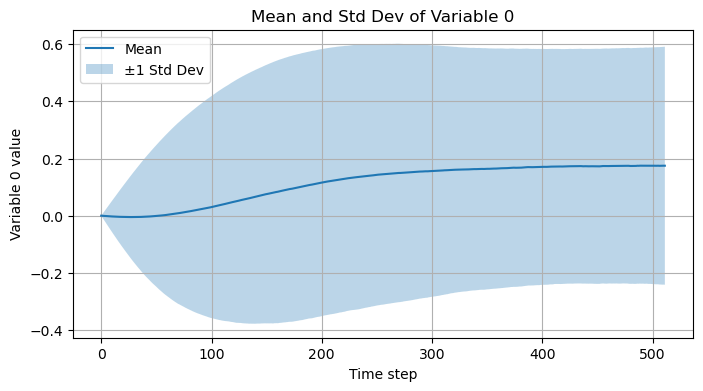

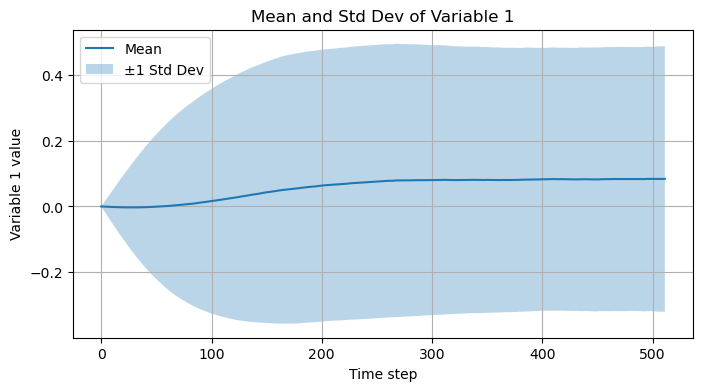

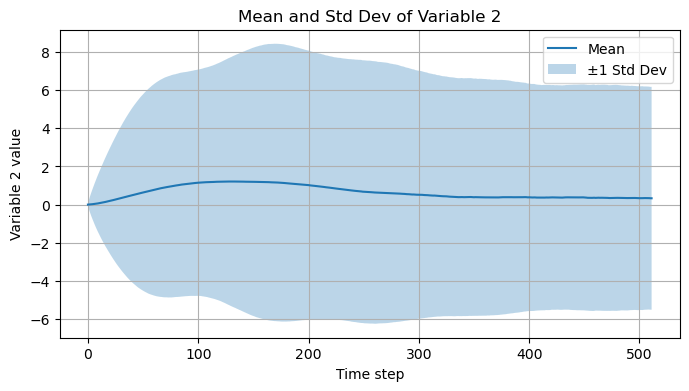

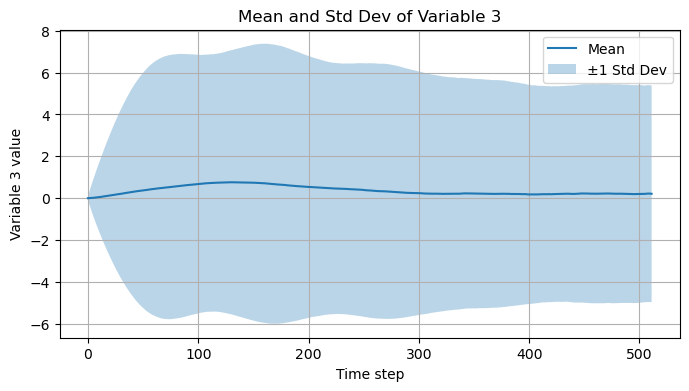

In [4]:
dataset.plot_mean_std(0)
plt.show()

dataset.plot_mean_std(1)
plt.show()

dataset.plot_mean_std(2)
plt.show()

dataset.plot_mean_std(3)
plt.show()

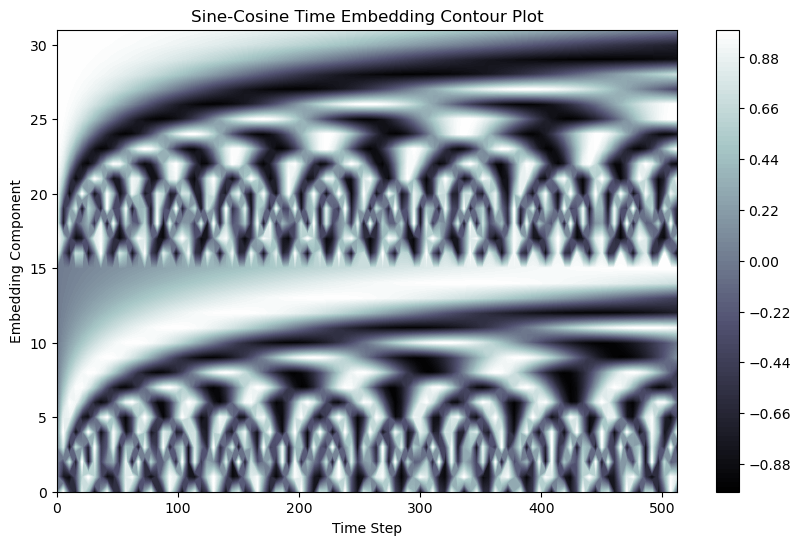

Physical Time Embedding Parameter:  1.565220832824707


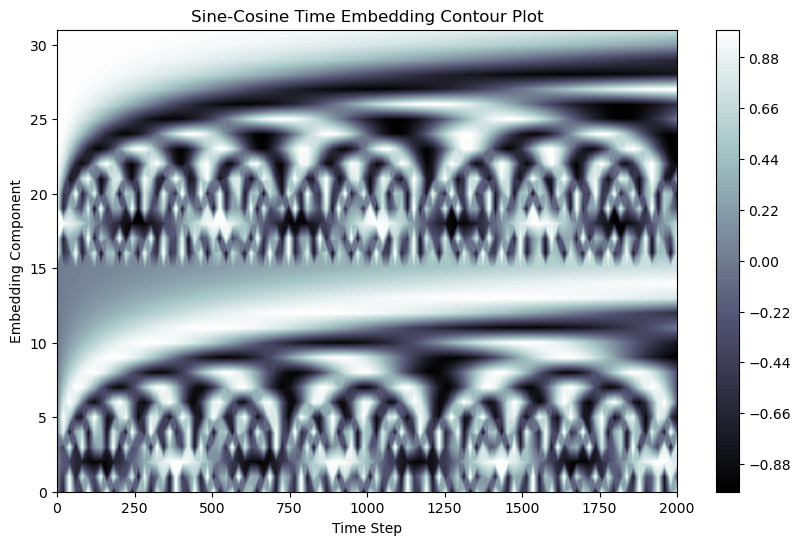

Diffusion Time Embedding Parameter:  0.8234798312187195


In [5]:
model.architechture.s_phys_embedding.plot_embedding()
plt.show()

for p in model.architechture.s_phys_embedding.parameters():
    print("Physical Time Embedding Parameter: ", p.item())

model.architechture.t_diff_embedding.plot_embedding()
plt.show()

for p in model.architechture.t_diff_embedding.parameters():
    print("Diffusion Time Embedding Parameter: ", p.item())

In [6]:
from datasets.MullerBrown import MD2D
import numpy as np
potential_class = MD2D.Muller_Brown('cuda')
potential = potential_class.potential_energy

def coords_to_name(coords):
    def format_val(val):
        s = f"{val:.10g}"  # avoid scientific notation
        s = s.replace('.', '_')
        if val < 0:
            return f"-{s[1:]}"  # keep double dash for negative
        return s
    return f"X-{format_val(coords[0])}_Y-{format_val(coords[1])}"



In [ ]:
ics = [[0,1],[0,0.5],[-1,0.5]]
for ic_xy in ics:
    name = coords_to_name(ic_xy)
    with torch.no_grad():
        # Create a grid of x and y values
        X, Y = torch.meshgrid(torch.linspace(-1.5, 1, 100,device=args.device), torch.linspace(-0.5, 2, 100,device=args.device))
        
        # Compute the potential on the grid
        Z = potential(X, Y)
        
        # Convert the tensors to numpy arrays for visualization
        X_np = X.cpu().numpy()
        Y_np = Y.cpu().numpy()
        Z_np = Z.cpu().numpy()
            
        s_phys_arr = np.arange(1,args.s_phys_max,10)
        sample_count = 200_000
        for s_phys in s_phys_arr:
    
            random = torch.randn(sample_count, 2, requires_grad=True,device=args.device)        
            momentum_ic = torch.stack([
                        ( random[:, 0]),
                        ( random[:, 1])
                    ], dim=1)*(2)**0.5
            
            position_ic = torch.ones_like(momentum_ic, requires_grad=True,device=args.device)
            position_ic = position_ic * torch.tensor([ic_xy[0],ic_xy[1]],device=args.device)
            
            ic = torch.cat([position_ic, momentum_ic], dim=-1)
            
            reverse_marginal =  model.sample_reverse_marginal(ic, 
                                                              (args.t_diff_max-1)*torch.ones(sample_count,device=args.device,dtype=torch.long),
                                                              s_phys*torch.ones(sample_count,device=args.device,dtype=torch.long))
            reverse_marginal_unscaled = dataset.unscale(reverse_marginal,s_phys*torch.ones(sample_count,device=args.device,dtype=torch.long)) + ic
    
            x = reverse_marginal_unscaled[:,0].cpu().detach().numpy()
            y = reverse_marginal_unscaled[:,1].cpu().detach().numpy()
            
            bins= 100
            levels=20
            # Create a 2D histogram of the data
            hist, xedges, yedges = np.histogram2d(x, y, bins=bins)
            
            # Compute the grid for the histogram
            xcenters = (xedges[:-1] + xedges[1:]) / 2
            ycenters = (yedges[:-1] + yedges[1:]) / 2
            X, Y = np.meshgrid(xcenters, ycenters)
    
            cmap = plt.get_cmap("bone").copy()
            fig = plt.figure(figsize=(5, 4),dpi=200)
            plt.gca().set_aspect('equal')
            plt.contourf(
                X_np, Y_np, Z_np,
                levels=torch.linspace(-150, 50, 50),
                cmap=cmap,
                extend='both',  # This fills values outside the levels using set_under and set_over
                alpha=1
            )
            plt.colorbar(label="Potential")
            # Plot contour lines
            cmap = 'cool'
            contours = plt.contour(X, Y, hist.T, levels=levels, cmap=cmap,alpha=0.5)
            plt.grid()
            plt.title("s = " + str(s_phys))
            plt.xlabel("x")
            plt.ylabel("y")
            plt.xlim(-1.5, 1)
            plt.ylim(-0.5, 2)
            plt.savefig("figs/Contour/"+name+"/ManyICddpm_"+str(s_phys)+".jpg")
            plt.close(fig)

/users/1/sull1276/.conda/envs/aced/lib/python3.12/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1728945370933/work/aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [8]:
coords = [-1, 0.5]

print(name)  # X--1_Y-0_5

X--1_Y-0_5


In [1]:
import os
from moviepy.editor import ImageSequenceClip

def create_animation(image_folder, file_pattern, fps, output_video):
    images = [os.path.join(image_folder, file_pattern.format(i)) for i in range(1, 511, 10)]
    clip = ImageSequenceClip(images, fps=fps)
    clip.write_videofile(output_video, fps=fps)

# Settings
base_fig_path = "figs"
base_out_path = "movies"
subfolders = ["Contour/X-0_Y-0_5", "Contour/X--1_Y-0_5", "Contour/X-0_Y-1"]
file_patterns = ["ManyICddpm_{}.jpg", "MD_{}.jpg"]
fps = 5

for folder in subfolders:
    for pattern in file_patterns:
        image_folder = os.path.join(base_fig_path, folder)
        pattern_prefix = pattern.split("_")[0]  # Keep original casing
        output_video = os.path.join(
            base_out_path, f"animation_{pattern_prefix}_{folder}.mp4"
        )
        create_animation(image_folder, pattern, fps, output_video)


Moviepy - Building video movies/animation_ManyICddpm_Contour/X-0_Y-0_5.mp4.
Moviepy - Writing video movies/animation_ManyICddpm_Contour/X-0_Y-0_5.mp4



Moviepy - Done !
Moviepy - video ready movies/animation_ManyICddpm_Contour/X-0_Y-0_5.mp4
Moviepy - Building video movies/animation_MD_Contour/X-0_Y-0_5.mp4.
Moviepy - Writing video movies/animation_MD_Contour/X-0_Y-0_5.mp4



Moviepy - Done !
Moviepy - video ready movies/animation_MD_Contour/X-0_Y-0_5.mp4
Moviepy - Building video movies/animation_ManyICddpm_Contour/X--1_Y-0_5.mp4.
Moviepy - Writing video movies/animation_ManyICddpm_Contour/X--1_Y-0_5.mp4



Moviepy - Done !
Moviepy - video ready movies/animation_ManyICddpm_Contour/X--1_Y-0_5.mp4
Moviepy - Building video movies/animation_MD_Contour/X--1_Y-0_5.mp4.
Moviepy - Writing video movies/animation_MD_Contour/X--1_Y-0_5.mp4



Moviepy - Done !
Moviepy - video ready movies/animation_MD_Contour/X--1_Y-0_5.mp4
Moviepy - Building video movies/animation_ManyICddpm_Contour/X-0_Y-1.mp4.
Moviepy - Writing video movies/animation_ManyICddpm_Contour/X-0_Y-1.mp4



Moviepy - Done !
Moviepy - video ready movies/animation_ManyICddpm_Contour/X-0_Y-1.mp4
Moviepy - Building video movies/animation_MD_Contour/X-0_Y-1.mp4.
Moviepy - Writing video movies/animation_MD_Contour/X-0_Y-1.mp4



Moviepy - Done !
Moviepy - video ready movies/animation_MD_Contour/X-0_Y-1.mp4
